In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


plt.style.use('bmh')

In [28]:
data_train = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/NasaTurbofan/data/train_FD001.txt',sep=" ",header=None)
data_test = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/NasaTurbofan/data/test_FD001.txt',sep=" ",header=None)
data_RUL = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/NasaTurbofan/data/RUL_FD001.txt',sep=" ",header=None)


In [29]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [30]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [31]:
data_RUL

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


In [32]:
data_train.drop(columns=[26,27], inplace=True)
data_test.drop(columns=[26,27], inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [33]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
1,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
2,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
3,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
4,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
5,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
6,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
7,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
8,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
9,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [34]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [35]:
data_train.columns = col_names

In [36]:
data_train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [37]:
data_train.isnull().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
dtype: int64

Каждый двигатель работает до отказа, поэтому RUL в каждом цикле определяется как разница между последним наблюдаемым циклом для этого двигателя и текущим циклом. Это преобразует набор данных в контролируемый формат регрессии.


In [38]:
# RUL calculaete 
max_cycles = data_train.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycles']
data_train = pd.merge(data_train, max_cycles, how='left', on='unit_number')
data_train['RUL'] = data_train['max_cycles'] - data_train['time_cycles']
data_train.drop('max_cycles',axis=1, inplace=True)
print('RUL calculate competed')

RUL calculate competed


In [39]:
data_train

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


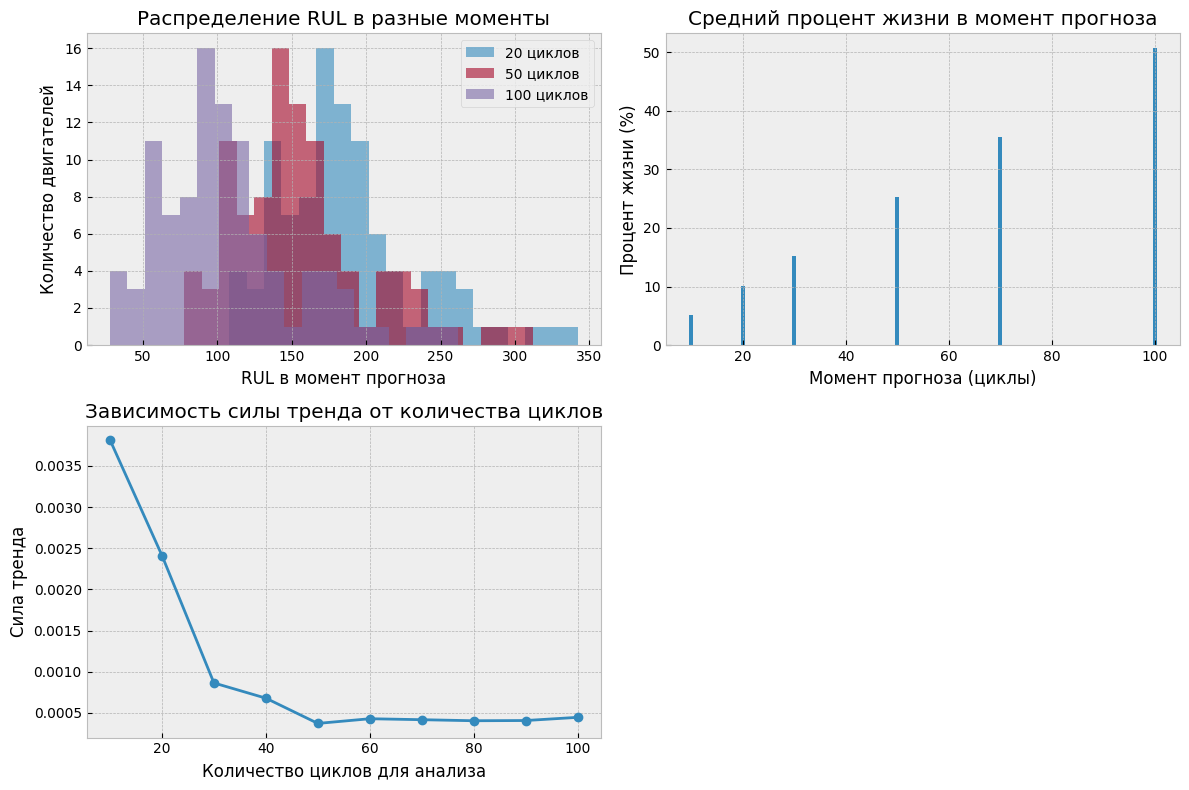

In [40]:
def analyze_optimal_prediction_time(df):
    """Анализирует оптимальное время для прогноза"""
    
    cycle_stats = []
    for engine_id in df['unit_number'].unique():
        engine_data = df[df['unit_number'] == engine_id]
        total_cycles = len(engine_data)
        
        # Анализируем разные моменты прогноза
        for prediction_point in [10, 20, 30, 50, 70, 100]:
            if prediction_point < total_cycles:
                rul_at_point = total_cycles - prediction_point
                cycle_stats.append({
                    'engine_id': engine_id,
                    'prediction_point': prediction_point, 
                    'rul_at_point': rul_at_point,
                    'total_cycles': total_cycles,
                    'percentage_life': (prediction_point / total_cycles) * 100
                })
    
    stats_df = pd.DataFrame(cycle_stats)
    
    # Визуализация
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    for point in [20, 50, 100]:
        point_data = stats_df[stats_df['prediction_point'] == point]
        plt.hist(point_data['rul_at_point'], alpha=0.6, label=f'{point} циклов', bins=20)
    plt.xlabel('RUL в момент прогноза')
    plt.ylabel('Количество двигателей')
    plt.legend()
    plt.title('Распределение RUL в разные моменты')
    
    plt.subplot(2, 2, 2)
    percentage_data = stats_df.groupby('prediction_point')['percentage_life'].mean()
    plt.bar(percentage_data.index, percentage_data.values)
    plt.xlabel('Момент прогноза (циклы)')
    plt.ylabel('Процент жизни (%)')
    plt.title('Средний процент жизни в момент прогноза')
    
    plt.subplot(2, 2, 3)
    # Анализ достаточности данных для трендов
    sensor_col = [col for col in df.columns if 'sensor' in col and '21' in col][0]
    correlation_by_cycles = []
    
    for cycles in range(10, 101, 10):
        correlations = []
        for engine_id in df['unit_number'].unique()[:10]:  # первые 10 для скорости
            engine_data = df[df['unit_number'] == engine_id]
            if len(engine_data) >= cycles:
                analysis_data = engine_data.head(cycles)
                sensor_trend = np.polyfit(np.arange(cycles), analysis_data[sensor_col].values, 1)[0]
                rul = analysis_data['RUL'].iloc[-1]
                correlations.append(abs(sensor_trend))  # сила тренда
        
        if correlations:
            correlation_by_cycles.append((cycles, np.mean(correlations)))
    
    cycles_vals, trend_strength = zip(*correlation_by_cycles)
    plt.plot(cycles_vals, trend_strength, 'o-')
    plt.xlabel('Количество циклов для анализа')
    plt.ylabel('Сила тренда')
    plt.title('Зависимость силы тренда от количества циклов')
    
    plt.tight_layout()
    plt.show()
    
    return stats_df

# Анализируем
optimal_time_analysis = analyze_optimal_prediction_time(data_train)

In [41]:
def create_engine_features_correct(df, analysis_cycles=50):
    """
    Создает фичи на основе первых N циклов и предсказывает ОСТАВШИЙСЯ ресурс
    
    Parameters:
    df - данные с RUL
    analysis_cycles - сколько начальных циклов использовать для прогноза
    """
    sensor_cols = [col for col in df.columns if 'sensor' in col]
    
    engine_features = []
    
    for engine_id in df['unit_number'].unique():  
        engine_data = df[df['unit_number'] == engine_id]
        
        # Берем только первые N циклов для анализа
        analysis_data = engine_data.head(analysis_cycles)
        
        # Если двигатель прожил меньше чем analysis_cycles, пропускаем
        if len(analysis_data) < analysis_cycles:
            continue
            
        features = {'unit_number': engine_id}
        
        # Создаем фичи из первых analysis_cycles циклов
        for sensor in sensor_cols:
            sensor_data = analysis_data[sensor]
            
            features[f'{sensor}_mean'] = float(sensor_data.mean())
            features[f'{sensor}_std'] = float(sensor_data.std())
            features[f'{sensor}_min'] = float(sensor_data.min())
            features[f'{sensor}_max'] = float(sensor_data.max())
            
            
            if len(sensor_data) > 1:
                x = np.arange(len(sensor_data))
                slope = np.polyfit(x, sensor_data.values, 1)[0]
                features[f'{sensor}_trend'] = float(slope)
            else:
                features[f'{sensor}_trend'] = 0.0
        
        
        # RUL = сколько осталось с момента анализа (cycle 50)
        features['RUL'] = float(analysis_data['RUL'].iloc[-1])  # RUL на 50-м цикле
        
        engine_features.append(features)
    
    result_df = pd.DataFrame(engine_features)
    
    print(f" Создано фич для {len(result_df)} двигателей")
    print(f" RUL после {analysis_cycles} циклов: {result_df['RUL'].min()} - {result_df['RUL'].max()}")
    
    return result_df


In [42]:
df_preprocessed = create_engine_features_correct(data_train, analysis_cycles=100)
df_preprocessed.head()

 Создано фич для 100 двигателей
 RUL после 100 циклов: 28.0 - 262.0


,unit_number,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_max,sensor_1_trend,sensor_2_mean,sensor_2_std,sensor_2_min,sensor_2_max,...,sensor_20_std,sensor_20_min,sensor_20_max,sensor_20_trend,sensor_21_mean,sensor_21_std,sensor_21_min,sensor_21_max,sensor_21_trend,RUL
0,1,518.67,0.0,518.67,518.67,-2.380800e-15,642.3293,0.295646,641.71,643.07,...,0.097499,38.68,39.18,-0.000940,23.367709,0.060668,23.2323,23.4999,-0.000757,92.0
1,2,518.67,0.0,518.67,518.67,-2.380800e-15,642.0244,0.317272,641.27,642.85,...,0.101200,38.81,39.24,-0.000532,23.417438,0.061902,23.2745,23.6005,-0.000618,187.0
2,3,518.67,0.0,518.67,518.67,-2.380800e-15,642.3071,0.321418,641.48,642.98,...,0.105519,38.78,39.23,-0.000627,23.380323,0.056007,23.2352,23.5181,-0.000061,79.0
3,4,518.67,0.0,518.67,518.67,-2.380800e-15,642.4752,0.293700,641.81,643.32,...,0.104572,38.69,39.21,-0.000826,23.340332,0.063258,23.1897,23.5074,-0.000344,89.0
4,5,518.67,0.0,518.67,518.67,-2.380800e-15,642.1267,0.311507,641.30,642.99,...,0.099804,38.80,39.29,-0.000605,23.415807,0.056088,23.3088,23.5503,-0.000270,169.0


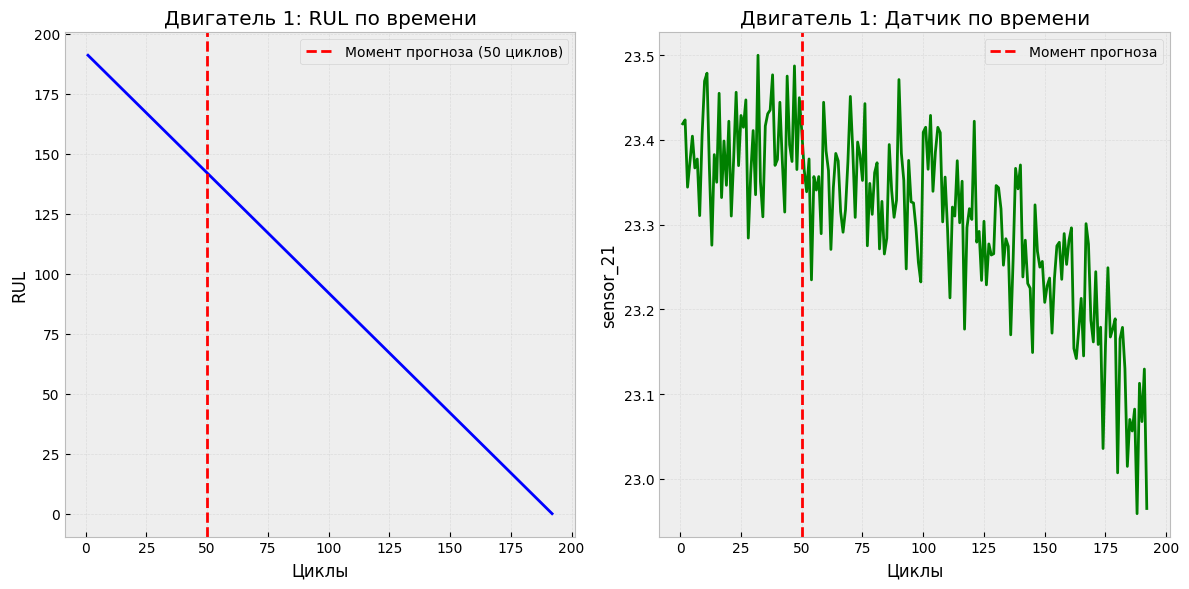

Двигатель 1:
Всего циклов жизни: 192
RUL в начале: 191
RUL на 50-м цикле: 142
RUL в конце: 0


In [43]:
def visualize_prediction_approach(df, engine_id=1):
    engine_data = df[df['unit_number'] == engine_id]
    
    plt.figure(figsize=(12, 6))
    
    # График RUL
    plt.subplot(1, 2, 1)
    plt.plot(engine_data['time_cycles'], engine_data['RUL'], 'b-', linewidth=2)
    plt.axvline(x=50, color='red', linestyle='--', label='Момент прогноза (50 циклов)')
    plt.xlabel('Циклы')
    plt.ylabel('RUL')
    plt.title(f'Двигатель {engine_id}: RUL по времени')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Пример датчика
    plt.subplot(1, 2, 2)
    sensor_col = [col for col in df.columns if 'sensor' in col and '21' in col][0]
    plt.plot(engine_data['time_cycles'], engine_data[sensor_col], 'g-', linewidth=2)
    plt.axvline(x=50, color='red', linestyle='--', label='Момент прогноза')
    plt.xlabel('Циклы')
    plt.ylabel(sensor_col)
    plt.title(f'Двигатель {engine_id}: Датчик по времени')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Показываем значения
    analysis_data = engine_data.head(50)
    print(f"Двигатель {engine_id}:")
    print(f"Всего циклов жизни: {len(engine_data)}")
    print(f"RUL в начале: {engine_data['RUL'].iloc[0]}")
    print(f"RUL на 50-м цикле: {analysis_data['RUL'].iloc[-1]}")
    print(f"RUL в конце: {engine_data['RUL'].iloc[-1]}")

# Визуализируем
visualize_prediction_approach(data_train, 1)

In [44]:
# Удалим неинформативные датчики
constant_cols = []
for col in df_preprocessed.columns:
    if 'sensor' in col and ('std' in col or 'trend' in col):
        if df_preprocessed[col].std() < 0.0001:
            sensor_name = col.split('_std')[0] if '_std' in col else col.split('_trend')[0]
            constant_cols.extend([c for c in df_preprocessed.columns if sensor_name in c])

constant_cols = list(set(constant_cols))
print(f'Удаление {len(constant_cols)} неимформативных фич')
df_preprocessed.drop(columns=constant_cols, inplace=True)
df_preprocessed.head()

Удаление 65 неимформативных фич


,unit_number,sensor_2_mean,sensor_2_std,sensor_2_min,sensor_2_max,sensor_2_trend,sensor_3_mean,sensor_3_std,sensor_3_min,sensor_3_max,...,sensor_20_std,sensor_20_min,sensor_20_max,sensor_20_trend,sensor_21_mean,sensor_21_std,sensor_21_min,sensor_21_max,sensor_21_trend,RUL
0,1,642.3293,0.295646,641.71,643.07,0.000403,1586.6894,4.277935,1577.60,1596.72,...,0.097499,38.68,39.18,-0.000940,23.367709,0.060668,23.2323,23.4999,-0.000757,92.0
1,2,642.0244,0.317272,641.27,642.85,0.002088,1583.7707,3.826199,1575.38,1593.24,...,0.101200,38.81,39.24,-0.000532,23.417438,0.061902,23.2745,23.6005,-0.000618,187.0
2,3,642.3071,0.321418,641.48,642.98,0.001580,1585.4699,3.983791,1577.22,1597.84,...,0.105519,38.78,39.23,-0.000627,23.380323,0.056007,23.2352,23.5181,-0.000061,79.0
3,4,642.4752,0.293700,641.81,643.32,0.002098,1587.7306,3.898644,1576.64,1600.12,...,0.104572,38.69,39.21,-0.000826,23.340332,0.063258,23.1897,23.5074,-0.000344,89.0
4,5,642.1267,0.311507,641.30,642.99,0.001787,1583.7224,3.983209,1574.80,1593.61,...,0.099804,38.80,39.29,-0.000605,23.415807,0.056088,23.3088,23.5503,-0.000270,169.0


In [45]:
# CORELLATIONS
correlations = []
for col in df_preprocessed.columns:
    if col not in ['unit_number', 'RUL']:
        corr = df_preprocessed[col].corr(df_preprocessed['RUL'])
        correlations.append((col, abs(corr)))

correlations.sort(key=lambda x : x[1], reverse=True)

top_15 = correlations[:15]
features, corr_values = zip(*top_15)
    
fig = px.bar(x=corr_values, y=features, 
                 orientation='h',
                 title='Топ-15 корреляций с RUL',
                 labels={'x': 'Абсолютная корреляция', 'y': 'Признаки'},
                 color=corr_values,
                 color_continuous_scale='viridis')
    
fig.show()

In [46]:
# Начнем делать baseline
X = df_preprocessed.drop(columns=['unit_number', 'RUL'])
y = df_preprocessed['RUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 24.89
MAE: 20.60


In [47]:
def train_model(X_train, X_test, y_train, y_test, cv_folds=5):
    models = {
        'RandomForestRegressor': RandomForestRegressor(n_estimators=100, 
                                                     random_state=42,
                                                     n_jobs=-1),
        'CatBoostRegressor': CatBoostRegressor(n_estimators=100,
                                              random_state=42,
                                              verbose=False),
        'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100,
                                                              random_state=42),
        
    }

    results = []
    best_score = np.inf  # Теперь ищем минимальный RMSE
    best_model = None
    best_model_name = ''
    best_scaler = None

    for name, model in models.items():
        try:
            # Масштабирование
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Кросс-валидация с сохранением всех scores
            cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                      cv=cv_folds, scoring='neg_mean_squared_error')
            cv_rmse_scores = np.sqrt(-cv_scores)
            
            # Обучение и предсказание
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            
            # Метрики
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results.append({
                'NAME': name,
                'CV_MEAN_RMSE': cv_rmse_scores.mean(),
                'CV_STD_RMSE': cv_rmse_scores.std(),
                'TEST_RMSE': rmse,
                'TEST_MAE': mae,
                'TEST_R2': r2,
                'Model_Obj': model,
                'Scaler_Obj': scaler
            })

            # Выбор лучшей модели по RMSE
            if rmse < best_score:
                best_score = rmse
                best_model = model
                best_model_name = name
                best_scaler = scaler
                
        except Exception as e:
            print(f"Ошибка при обучении {name}: {str(e)}")
            continue

    if results:
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values('TEST_RMSE')
        
    return best_model, best_model_name, best_scaler, results_df

In [48]:
train_model(X_train, X_test, y_train, y_test)

(RandomForestRegressor(n_jobs=-1, random_state=42),
 'RandomForestRegressor',
 StandardScaler(),
                         NAME  CV_MEAN_RMSE  CV_STD_RMSE  TEST_RMSE   TEST_MAE  \
 0      RandomForestRegressor     33.259201     4.907160  24.760322  20.477000   
 2  GradientBoostingRegressor     32.621846     4.219224  25.272575  19.382996   
 1          CatBoostRegressor     34.639323     5.173564  26.561047  21.610902   
 
     TEST_R2                                          Model_Obj  \
 0  0.644626  (DecisionTreeRegressor(max_features=1.0, rando...   
 2  0.629770  ([DecisionTreeRegressor(criterion='friedman_ms...   
 1  0.591056  <catboost.core.CatBoostRegressor object at 0x1...   
 
          Scaler_Obj  
 0  StandardScaler()  
 2  StandardScaler()  
 1  StandardScaler()  )

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 24.76
MAE: 20.48


In [50]:

metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R²': r2_score(y_test, y_pred),
    'MAPE': np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Процентная ошибка
}

for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

RMSE: 24.7603
MAE: 20.4770
R²: 0.6446
MAPE: 23.4523
